Predicting Star Ratings:


In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [26]:
import ujson as json
import gzip

with gzip.open('yelp_train_academic_dataset_business.json.gz') as f:
    data = [json.loads(line) for line in f]

In [27]:
star_ratings = [row['stars'] for row in data]

In [6]:
#import dill
#dill.dump(estimator, open('estimator.dill', 'w'))

In [7]:
#import dill
#estimator = dill.load(open('estimator.dill', 'r'))

city avgerage:

In [104]:
from collections import defaultdict
star_sum = defaultdict(int)
count = defaultdict(int)

In [105]:
for row, stars in zip(data, star_ratings):
    # increment the running sum in star_sum
    star_sum[row['city']]+=stars
    # increment the running count in count
    count[row['city']]+=1

In [106]:
avg_stars = dict()
for city in star_sum:
    # calculate average star rating and store in avg_stars
    avg_stars[city]=star_sum[city]/count[city]

Model:

In [14]:

from sklearn import base

class CityEstimator(base.BaseEstimator, base.RegressorMixin):
    
    def __init__(self):
        self.avg_stars = defaultdict(int)
       
    
    def fit(self, X, y):
        # Store the average rating per city in self.avg_stars
        star_sum = defaultdict(int)
        count = defaultdict(int)
        for row, stars in zip(X,y):
            # increment the running sum in star_sum
            star_sum[row['city']]+=stars
            # increment the running count in count
            count[row['city']]+=1
            for city in star_sum:
                # calculate average star rating and store in avg_stars
                self.avg_stars[city]=star_sum[city]/count[city]

        return self
    
    def predict(self, X):
        return [self.avg_stars[row['city']] for row in X]



In [101]:
city_est = CityEstimator()
city_est.fit(data, star_ratings)

CityEstimator()

In [102]:
city_est.predict(data[:5])

[3.6702903946388683, 3.75, 3.75, 3.75, 3.75]

latitude-longitude model:

In [6]:
import numpy as np
from sklearn import base
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        return_list=[]
        for i in X:
            line_list=[]
            for j in self.col_names:
                line_list.append(i[j])
            return_list.append(line_list)      
        return  return_list

In [8]:
cst = ColumnSelectTransformer(['latitude', 'longitude'])
cst.fit_transform(data[:1])

[[33.499313, -111.983758]]

In [10]:
cst = ColumnSelectTransformer(['latitude', 'longitude'])
assert (cst.fit_transform(data[:1])
        == [[data[0]['latitude'], data[0]['longitude']]])

In [11]:
from sklearn.neighbors import KNeighborsRegressor

data_transform = cst.fit_transform(data)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_transform, star_ratings)
test_data = data[:5]
test_data_transform = cst.transform(test_data)
knn.predict(test_data_transform)

array([4. , 4.2, 4. , 3.8, 4.2])

In [12]:
knn.fit(data_transform, star_ratings)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [23]:
#example for Pipline
"""
vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()

vX = vect.fit_transform(Xtrain)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)

# Now evaluate all steps on test set
vX = vect.fit_transform(Xtest)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
predicted = pipeline.fit(Xtrain).predict(Xtrain)
# Now evaluate all steps on test set
predicted = pipeline.predict(Xtest)
"""

"\nvect = CountVectorizer()\ntfidf = TfidfTransformer()\nclf = SGDClassifier()\n\nvX = vect.fit_transform(Xtrain)\ntfidfX = tfidf.fit_transform(vX)\npredicted = clf.fit_predict(tfidfX)\n\n# Now evaluate all steps on test set\nvX = vect.fit_transform(Xtest)\ntfidfX = tfidf.fit_transform(vX)\npredicted = clf.fit_predict(tfidfX)\npipeline = Pipeline([\n    ('vect', CountVectorizer()),\n    ('tfidf', TfidfTransformer()),\n    ('clf', SGDClassifier()),\n])\npredicted = pipeline.fit(Xtrain).predict(Xtrain)\n# Now evaluate all steps on test set\npredicted = pipeline.predict(Xtest)\n"

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
pipe = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
    ('knn', KNeighborsRegressor(n_neighbors=5))
    ])

This should work the same way.

In [25]:
pipe.fit(data, star_ratings)
test_data = data[:5]
pipe.predict(test_data)

array([4. , 4.2, 4. , 3.8, 4.2])

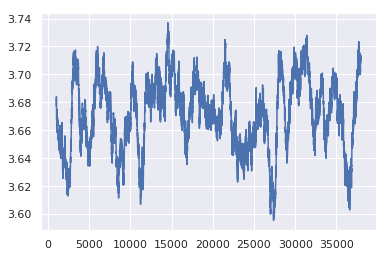

In [83]:
from pandas import Series
import matplotlib.pyplot as plt

plt.plot(Series.rolling(Series(random_star_ratings), window=1000).mean())

In [27]:
#example of train_test_split
import numpy as np
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Finally, following the above modeling pattern, we define our classifer, in this case KNN, fit it to our training data and evaluate its accuracy. We’ll be using an arbitrary K but we will see later on how cross validation can be used to find its optimal value.

# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print accuracy_score(y_test, pred)

SyntaxError: invalid syntax (<ipython-input-27-a6248e49ae45>, line 11)

In [36]:
#first method
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data, star_ratings, test_size=0.2, random_state=42,shuffle=True)
mean_score=0
for n in range(600,700,1):
    lat_long_est = Pipeline([
            # ColumnSelectTransformer
            # KNeighborsRegressor
        ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
        ('knn', KNeighborsRegressor(n_neighbors=n))
        ])
    lat_long_est.fit(X_train, y_train)
    pred=lat_long_est.predict(X_test)
    score = -cross_val_score(lat_long_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
    if mean_score==0:
        min_score=score
        min_n=n
    else:
        if np.min([min_score,score])==min_score:
            min_score=score
            min_n=n
    print(score)
        
#    lat_long_est.score(y_test, pred)
    
#    print(accuracy_score(y_test, pred))
#scores = cross_val_score(lat_long_est, X_test, y_test, cv=10, scoring='accuracy')
#score = -cross_val_score(lat_long_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
#cv_test_error = -model_selection.cross_val_score(est,X_random_order,y_random_order,cv=5)
#cv_test_errors.append(cv_test_error.mean())
#min_n
#metrics.mean_squared_error(X_test, pred)
min_score

0.7939077141248968
0.7939306287521686
0.7939207497649124


KeyboardInterrupt: 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics
#hard shuffle
import numpy as np
random_data=data
for i in list(range(1,300)):
    data_temp=random_data
    random_data=[]
    indices = np.random.permutation(range(len(data_temp)))
    s=0
    for i in  range(len(data_temp)):
        d=0
        random_data.append(data_temp[indices[s]])
        s+=1
random_star_ratings=[row['stars'] for row in random_data]     
  
X_train, X_test, y_train, y_test = train_test_split(random_data,random_star_ratings, test_size=0.2, random_state=42,shuffle=True)


In [84]:
#first method with shuffle

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics
  
X_train, X_test, y_train, y_test = train_test_split(random_data,random_star_ratings, test_size=0.2, random_state=42,shuffle=True)
mean_score=0
for n in range(1000,10000,1):
    lat_long_est = Pipeline([
            # ColumnSelectTransformer
            # KNeighborsRegressor
        ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
        ('knn', KNeighborsRegressor(n_neighbors=n))
        ])
    lat_long_est.fit(X_train, y_train)
    pred=lat_long_est.predict(X_test)
    score = -cross_val_score(lat_long_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
    if mean_score==0:
        min_score=score
        min_n=n
    else:
        if np.min([min_score,score])==min_score:
            min_score=score
            min_n=n
    print(score)
        
#    lat_long_est.score(y_test, pred)
    
#    print(accuracy_score(y_test, pred))
#scores = cross_val_score(lat_long_est, X_test, y_test, cv=10, scoring='accuracy')
#score = -cross_val_score(lat_long_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
#cv_test_error = -model_selection.cross_val_score(est,X_random_order,y_random_order,cv=5)
#cv_test_errors.append(cv_test_error.mean())
#min_n
#metrics.mean_squared_error(X_test, pred)
min_score

0.7864363536239706
0.7864376188853226


KeyboardInterrupt: 

In [ ]:
#example of gridsearch
parameters = {}
parameters['imp__strategy'] = ['mean', 'median', 'most_frequent']
parameters['feat_select__k'] = [5, 10]

CV = GridSearchCV(pipeline, parameters, scoring = 'mean_absolute_error', n_jobs= 1)
CV.fit(x_train_cont, y_train)   

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)    

y_pred = CV.predict(x_valid_cont)
print('MAE on validation set: %s' % (round(MAE(y_valid, y_pred), 5)))

In [52]:
#Try Gridsearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import os
import time

lat_long_est = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
    ('knn', KNeighborsRegressor())
    ])
parameters = dict(knn__n_neighbors=list(range(400,420)))   

CV = GridSearchCV(lat_long_est, parameters, scoring = 'neg_mean_absolute_error', n_jobs= 1)
CV.fit(data, star_ratings)

print(CV.best_score_)    
print(CV.best_params_)


-0.7212729895160259
{'knn__n_neighbors': 417}


In [44]:
lat_long_est.get_params().keys()

dict_keys(['memory', 'steps', 'data_transform', 'knn', 'data_transform__col_names', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [89]:
lat_long_est = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
('knn', KNeighborsRegressor(n_neighbors=417))
    ])
lat_long_est.fit(data, star_ratings)
pred=lat_long_est.predict(X_test)
score = -cross_val_score(lat_long_est, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
score

0.786281996773313

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import os
import time
X_train, X_test, y_train, y_test = train_test_split(random_data,random_star_ratings, test_size=0.2, random_state=42,shuffle=True)

lat_long_est2 = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
    ('rfr', RandomForestRegressor(max_depth=15,n_estimators=100,random_state=42,n_jobs=-1))
    ])
lat_long_est2.fit(random_data, random_star_ratings)
pred=lat_long_est2.predict(X_test)
score = -cross_val_score(lat_long_est2, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
score

#parameters = dict(rfr__max_depth=list(range(3,7)),rfr__n_estimators=list(range(300,320)))   

#CV = GridSearchCV(lat_long_est2, parameters, scoring = 'neg_mean_absolute_error', n_jobs= 1)
#CV.fit(data, star_ratings)

#print(CV.best_score_)    
#print(CV.best_params_)

0.8123638550226385

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
lat_long_est = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
    ('knn', KNeighborsRegressor(n_neighbors=5,n_jobs=-1))
    ])

lat_long_est.fit(random_data, random_star_ratings)
res=lat_long_est.predict(random_data)-random_star_ratings
lat_long_res = Pipeline([
        # ColumnSelectTransformer
        # KNeighborsRegressor
    ('data_transform', ColumnSelectTransformer(['latitude', 'longitude'])),
    ('rfr', RandomForestRegressor(max_depth=45,n_estimators=100,random_state=42,n_jobs=-1))
    ])
lat_long_res.fit(random_data, res)
f1=FunctionalFunction(lat_long_est.predict)
f2=FunctionalFunction(lat_long_res.predict)
f3=f1+f2
f3(X_test)

array([3.41742979, 4.35192943, 3.67670016, ..., 3.59476753, 3.93515719,
       3.4289928 ])

In [66]:
lat_long_est.predict(X_test)

array([3.6, 4.5, 3.5, ..., 3.7, 3.7, 3.6])

category model:

In [9]:
class DictEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        # X will come in as a list of lists of lists.  Return a list of
        # dictionaries corresponding to those inner lists.
        #        coords=np.empty((0,2),int)
        cats=[]
        for i in X:
            # increment the running sum in star_sum
            cat_dic={}
            if cat_dic=="": continue
            for j in i[0]:
                cat_dic[j]=1

            cats.append(cat_dic)                  
#            coords = np.append(coords, [[latitude,longitude]], axis=0) 
        return cats

In [33]:
from sklearn.feature_extraction import DictVectorizer
cst = ColumnSelectTransformer(['categories'])
cat_column=cst.fit_transform(data)
cat_column_encoded=DictEncoder().fit_transform(cat_column)
cat_column_encoded

DictVectorizer(sparse=False).fit_transform(cat_column_encoded).shape

(37938, 706)

In [168]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
category_est=Pipeline([('cst',ColumnSelectTransformer(['categories'])),
                      ('de',DictEncoder()),
                      ('dV',DictVectorizer(sparse=False)),
                       ('rdg',Ridge()),
                     ])
category_est.fit(data, star_ratings)

Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['categories'])), ('de', DictEncoder()), ('dV', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('rdg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

attribute model:

In [35]:
import numpy as np
from sklearn import base
import collections




In [10]:
def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        if v==True: v=1
        if v==False: v=0
        if v=='free': v=1
        if v=='no': v=0            
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
class DictFlatter(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        
        return self
   
    def transform(self, X):
        # X will come in as a list of lists of lists.  Return a list of
        # dictionaries corresponding to those inner lists.
        #        coords=np.empty((0,2),int)
        cats=[]
        for i in X:
            # increment the running sum in star_sum
            line_dict=flatten(i[0])
            cats.append(line_dict)
#            coords = np.append(coords, [[latitude,longitude]], axis=0
        return cats


In [67]:
cst = ColumnSelectTransformer(['attributes'])
cat_column=cst.fit_transform(data)
len(cat_column)
cat_column_encoded=DictFlatter().fit_transform(cat_column)
len(cat_column_encoded)
final1=DictVectorizer(sparse=False).fit_transform(cat_column_encoded)
final2=OneHotEncoder(sparse=False).fit_transform(final1)
final2

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [69]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
attribute_est=Pipeline([('cst',ColumnSelectTransformer(['attributes'])),
                      ('de',DictFlatter()),                        
                      ('dV',DictVectorizer(sparse=False)),
                        ('ohe', OneHotEncoder(sparse=False)),
                      ('rg', Ridge()),
                     ])
attribute_est.fit(data, star_ratings)
#parameters = dict(rg__alpha=[1e-8,1,10])   

#CV = GridSearchCV(attribute_est, parameters, scoring = 'neg_mean_absolute_error', cv=10,n_jobs= 1)
#CV.fit(data, star_ratings)

#print(CV.best_score_)    
#print(CV.best_params_)
#attribute_est.score(data, star_ratings)

Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['attributes'])), ('de', DictFlatter()), ('dV', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('ohe', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('rg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [105]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
attribute_est=Pipeline([('cst',ColumnSelectTransformer(['attributes'])),
                      ('de',DictFlatter()),                        
                      ('dV',DictVectorizer(sparse=False)),
                        ('ohe', OneHotEncoder(sparse=False)),
                      ('knn', KNeighborsRegressor(n_neighbors=38,n_jobs=-1)),
                     ])
attribute_est.fit(random_data, random_star_ratings)


Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['attributes'])), ('de', DictFlatter()), ('dV', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('ohe', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='err...owski',
          metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
          weights='uniform'))])

In [107]:
attribute_est.score(data, star_ratings)

0.08415908504324576

full model:

In [13]:
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
class EstimatorTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, estimator):
        # What needs to be done here?        
        self.estimator = estimator
    
    def fit(self, X, y):
        # Fit the stored estimator.
        # Question: what should be returned?
        self.estimator.fit(X,y)
        return self

    def transform(self, X):
        # Use predict on the stored estimator as a "transformation".
        # Be sure to return a 2-D array.
        if not isinstance(self.estimator.predict(X), np.ndarray):
            i=0
            new_list=[]
            while i<len(self.estimator.predict(X)):
                new_list.append(self.estimator.predict(X)[i:i+1])
                i+=1
            return new_list
        else:
            return self.estimator.predict(X).reshape(-1, 1)

In [130]:
city_est=Pipeline([('cst',ColumnSelectTransformer(['attributes'])),
                      ('de',DictFlatter()),                        
                      ('dV',DictVectorizer(sparse=False)),
                        ('ohe', OneHotEncoder(sparse=False)),
                      ('knn', KNeighborsRegressor(n_neighbors=40)),
                     ])
city_est.fit(data, star_ratings)

Pipeline(memory=None,
     steps=[('cst', ColumnSelectTransformer(col_names=['attributes'])), ('de', DictFlatter()), ('dV', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('ohe', OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='err...kowski',
          metric_params=None, n_jobs=1, n_neighbors=40, p=2,
          weights='uniform'))])

In [131]:
city_est.predict(data[:5])

array([4.0375, 3.775 , 3.5125, 3.35  , 3.25  ])

In [132]:
city_trans = EstimatorTransformer(city_est)
city_trans.fit(data, star_ratings)
[r[0] for r in city_trans.transform(data[:5])]

[4.0375, 3.775, 3.5125, 3.35, 3.25]

This should work as follows:

In [119]:
city_trans = EstimatorTransformer(city_est)
city_trans.fit(data, star_ratings)
assert ([r[0] for r in city_trans.transform(data[:5])]
        == city_est.predict(data[:5]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Create an instance of `ModelTransformer` for each of the previous four models. Combine these together in a single feature matrix with a
[`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion).

In [47]:
import collections
from sklearn.pipeline import FeatureUnion
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
union = FeatureUnion(transformer_list=[('city_est_tr', EstimatorTransformer(CityEstimator())),
        # FeatureUnions use the same syntax as Pipelines
                      ('lat_long_est_tr', EstimatorTransformer(Pipeline([('cst1', ColumnSelectTransformer(['latitude', 'longitude'])),
                                                 ('rfr1', RandomForestRegressor(max_depth=15,n_estimators=300,random_state=42,n_jobs=-1)),
                                                ]))),
                      ('category_est_tr', EstimatorTransformer(Pipeline([('cst2',ColumnSelectTransformer(['categories'])),
                                                 ('de2',DictEncoder()),
                                                 ('dV2',DictVectorizer(sparse=False)),
                                                 ('rdg2',Ridge()),
                                                ]))),
                      ('attribute_est_tr', EstimatorTransformer(Pipeline([('cst3',ColumnSelectTransformer(['attributes'])),
                                                  ('de3',DictFlatter()),
                                                  ('dV3',DictVectorizer(sparse=False)),
                                                  ('ohe3', OneHotEncoder(sparse=False)),
                                                  ('knn3', KNeighborsRegressor(n_neighbors=40,n_jobs=-1)),
                                                 ]))),
                     ],n_jobs=-1)


In [46]:
#parameter test
import collections
from sklearn.pipeline import FeatureUnion
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
union2 = FeatureUnion(transformer_list=[('city_est_tr', EstimatorTransformer(CityEstimator())),
        # FeatureUnions use the same syntax as Pipelines
                      ('lat_long_est_tr', EstimatorTransformer(Pipeline([('cst1', ColumnSelectTransformer(['latitude', 'longitude'])),
                                                 ('rfr1', RandomForestRegressor(max_depth=5,n_estimators=300,random_state=42,n_jobs=-1)),
                                                ]))),
                      ('category_est_tr', EstimatorTransformer(Pipeline([('cst2',ColumnSelectTransformer(['categories'])),
                                                 ('de2',DictEncoder()),
                                                 ('dV2',DictVectorizer(sparse=False)),
                                                 ('rdg2',Ridge()),
                                                ]))),
                      ('attribute_est_tr', EstimatorTransformer(Pipeline([('cst3',ColumnSelectTransformer(['attributes'])),
                                                  ('de3',DictFlatter()),
                                                  ('dV3',DictVectorizer(sparse=False)),
                                                  ('ohe3', OneHotEncoder(sparse=False)),
                                                  ('knn3', KNeighborsRegressor(n_neighbors=140,n_jobs=-1)),
                                                 ]))),
                     ],n_jobs=-1)


In [48]:
union2.fit(data[:1000], star_ratings[:1000])
uni2_trans=union2.transform(data[:1000])

In [51]:
knn3=KNeighborsRegressor(n_neighbors=20,n_jobs=-1)
knn3_fit=knn3.fit(uni2_trans[:1000],star_ratings[:1000])
#knn3_fit.predict(uni2_trans[:1000])

In [91]:
union = make_union(*[
    make_pipeline(FunctionTransformer(CityEstimator())),
    make_pipeline(ColumnSelectTransformer(['latitude', 'longitude']), FunctionTransformer(RandomForestRegressor(max_depth=15,n_estimators=300,random_state=42))),
    make_pipeline(ColumnSelectTransformer(['categories']),DictEncoder(),DictVectorizer(sparse=False),FunctionTransformer(Ridge())),
    make_pipeline(ColumnSelectTransformer(['attributes'])),DictFlatter(),DictVectorizer(sparse=False), FunctionTransformer(KNeighborsRegressor(n_neighbors=40)),
])


This should return a feature matrix with four columns.

In [22]:
union.fit(data, star_ratings)
trans_data = union.transform(data[:10])
assert trans_data.shape == (10, 4)

Finally, use a pipeline to combine the feature union with a linear regression (or another model) to weight the predictions.

In [41]:
#score 0.22
import timet
start_time = time.time()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
full_est =Pipeline([('un',union),
                    ('clf', Ridge()),
                     ])
full_est.fit(random_data, random_star_ratings)
print("--- %s seconds ---" % (time.time() - start_time))

--- 769.1860287189484 seconds ---


In [52]:
#0.338 with n=40
#-0.07654154099236 n=5
#.41 n=100
#.46 n=200
#.508 n=300
#.58 n=600
#.71 n=2000
#.77 n=5000
#.76 n=10000 mysc 
import time
start_time = time.time()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
full_est4 =Pipeline([('un',union2),
                    ('knn3', KNeighborsRegressor(n_neighbors=2000,n_jobs=-1)),
                     ])
full_est4.fit(data, star_ratings)
print("--- %s seconds ---" % (time.time() - start_time))

--- 973.0372188091278 seconds ---


In [86]:
score = -cross_val_score(full_est4, X_test, y_test,cv=10, scoring='neg_mean_squared_error').mean()
score

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 6829, n_neighbors = 10000

In [43]:
#score 0.0434 with md=15
#score 0.0588 with md=5
#score 0.04 with es=100
#score 0.002 md=5, es=100
import time
start_time = time.time()
full_est3 =Pipeline([('un',union),
                    ('rfr', RandomForestRegressor(max_depth=5,n_estimators=100,random_state=42,n_jobs=-1)),
                     ])
full_est3.fit(random_data, random_star_ratings)
print("--- %s seconds ---" % (time.time() - start_time))

--- 761.3278841972351 seconds ---


In [54]:
#0.2352558507169197
import time
start_time = time.time()
combinun12 = Pipeline([('unioncomb', FeatureUnion(transformer_list = [
        # FeatureUnions use the same syntax as Pipelines
                      ('pipe1', EstimatorTransformer(full_est)),
                      ('pipe2', EstimatorTransformer(full_est2)),                      
                     ],n_jobs=-1)),
                       ('knn4', KNeighborsRegressor(n_neighbors=40,n_jobs=-1)),
                      ])
combinun12.fit(random_data, random_star_ratings)
print("--- %s seconds ---" % (time.time() - start_time))

/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/conda/envs/data3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._back

--- 3882.5365974903107 seconds ---


In [58]:
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
start_time = time.time()
res=full_est.predict(random_data)-random_star_ratings
res_fit = Pipeline([('un',union),
                    ('rfr', RandomForestRegressor(max_depth=45,n_estimators=100,random_state=42,n_jobs=-1)),
                   ])
res_fit.fit(random_data, res)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1582.827258348465 seconds ---


In [59]:
class FunctionalFunction(object):
    def __init__(self, func):
        self.func = func
    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)
    def __add__(self, other):
        def summed(*args, **kwargs):
            return self(*args, **kwargs) + other(*args, **kwargs)
        return summed
    def __mul__(self, other):
        def composed(*args, **kwargs):
            return self(other(*args, **kwargs))
        return composed
f1=FunctionalFunction(full_est.predict)
f2=FunctionalFunction(res_fit.predict)
f3=f1+f2